# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:**Shivanjali Jagtap

**Student ID:**202201040070

**Date of Submission:** 17/04/2025

**Group Members**: Sachin Jadhav , Khushi Narad


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [2]:
# Imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab data package

# Load CSV file
df = pd.read_csv('/content/spam.csv', encoding='latin-1', usecols=[0, 1], names=['label', 'message'], skiprows=1)
print(df.head())

# Drop any missing values
df.dropna(inplace=True)

# Text Preprocessing
# 1. Lowercase
df['message'] = df['message'].str.lower()

# 2. Tokenization
df['tokens'] = df['message'].apply(word_tokenize)

# 3. Remove stopwords and non-alpha tokens
stop_words = set(stopwords.words('english'))
df['filtered'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['filtered'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# 5. Join lemmatized tokens to form clean text
df['clean_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))
df = df[df['clean_text'].str.strip() != '']  # Remove empty rows

print("\nSample clean text:\n", df['clean_text'].sample(5, random_state=42).tolist())

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()  # Initialize TfidfVectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])  # Use 'clean_text' column for TF-IDF

X = X_tfidf
y = df['label']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Sample clean text:
 ['gorgeous keep pix cumming thank', 'ahhhh woken bad dream u tho dont like u right didnt know anything comedy night guess im', 'sorry ca help', 'get gandhipuram walk cross cut road right side lt gt street road turn first right', 'thing change sentence want concentrate educational career im leaving']


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.


=== Naive Bayes ===
Accuracy: 0.9676258992805755
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       963
        spam       0.99      0.77      0.86       149

    accuracy                           0.97      1112
   macro avg       0.98      0.88      0.92      1112
weighted avg       0.97      0.97      0.97      1112



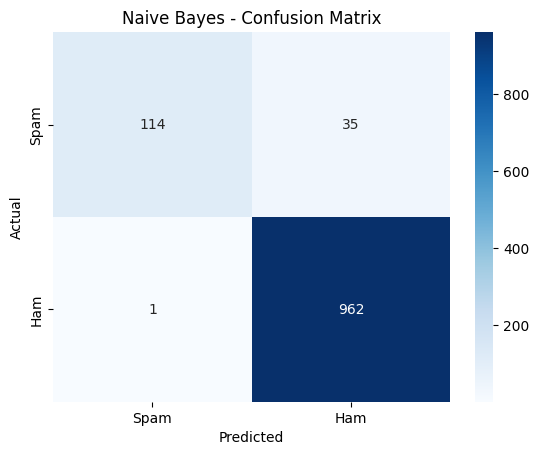

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# 3. Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=['spam', 'ham'])
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'], cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 4. Run Evaluation for Naive Bayes
evaluate_model("Naive Bayes", y_test, y_pred_nb)


In [4]:
# Example message for prediction
new_message = ["Free entry in 2 a wkly comp to win FA Cup final tickets. Text FA to 87121 to receive entry."]

# Apply the same preprocessing steps (tokenization, stopwords removal, lemmatization) to the new message

# Tokenization
new_message_tokens = word_tokenize(new_message[0].lower())

# Remove stopwords and non-alphabetic words
stop_words = set(stopwords.words('english'))
new_message_filtered = [word for word in new_message_tokens if word.isalpha() and word not in stop_words]

# Lemmatization
lemmatizer = WordNetLemmatizer()
new_message_lemmatized = [lemmatizer.lemmatize(word) for word in new_message_filtered]

# Join lemmatized tokens to form clean text
new_message_cleaned = ' '.join(new_message_lemmatized)

# Transform the new message using the same vectorizer
new_message_tfidf = tfidf_vectorizer.transform([new_message_cleaned])


nb_pred = nb_model.predict(new_message_tfidf)

# Print the prediction results

print(f"Naive Bayes Prediction: {nb_pred[0]}")


Naive Bayes Prediction: spam


In [5]:

# Example message for prediction
new_message = ["U dun say so early hor... U c already then say...,,,"]

# Apply the same preprocessing steps (tokenization, stopwords removal, lemmatization) to the new message

# Tokenization
new_message_tokens = word_tokenize(new_message[0].lower())

# Remove stopwords and non-alphabetic words
stop_words = set(stopwords.words('english'))
new_message_filtered = [word for word in new_message_tokens if word.isalpha() and word not in stop_words]

# Lemmatization
lemmatizer = WordNetLemmatizer()
new_message_lemmatized = [lemmatizer.lemmatize(word) for word in new_message_filtered]

# Join lemmatized tokens to form clean text
new_message_cleaned = ' '.join(new_message_lemmatized)

# Transform the new message using the same vectorizer
new_message_tfidf = tfidf_vectorizer.transform([new_message_cleaned])


nb_pred = nb_model.predict(new_message_tfidf)


print(f"Naive Bayes Prediction: {nb_pred[0]}")


Naive Bayes Prediction: ham


**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Shivanjali Jagtap confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Shivanjali Jagtap

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion